In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

kaggle Link: https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction

In [28]:
data=pd.read_csv('Cellphone.csv')

In [29]:
data.shape

(161, 14)

In [30]:
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [31]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [33]:
data=data.drop(['Product_id'],axis=1)

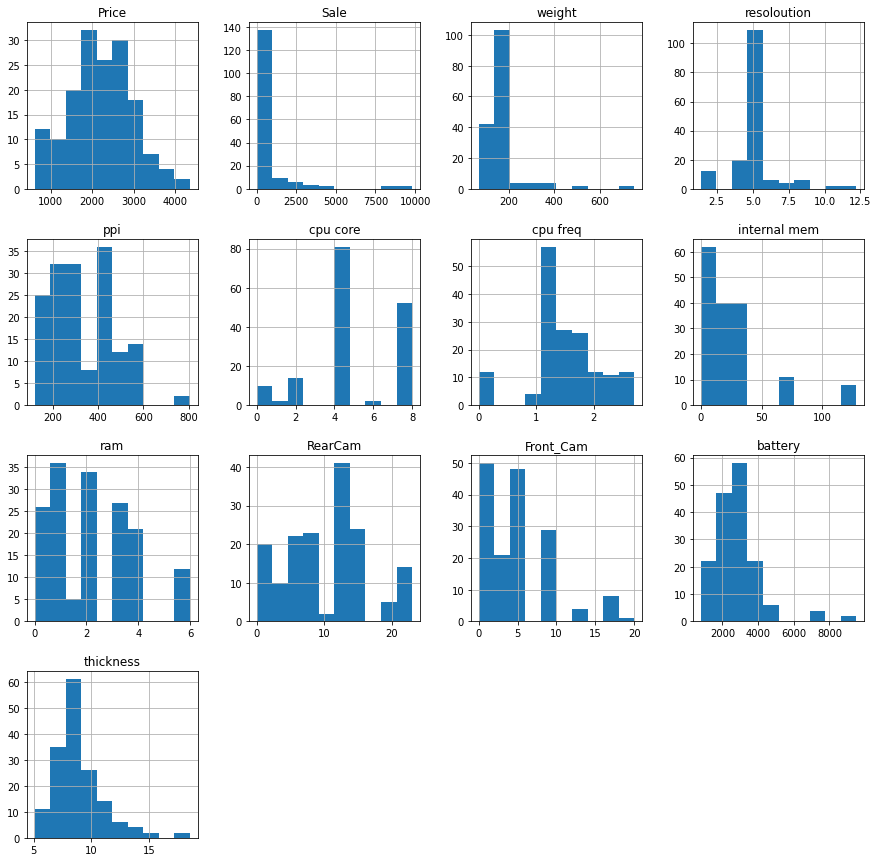

In [34]:
data.hist(figsize=(15,15))
plt.show()

In [35]:
l=['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

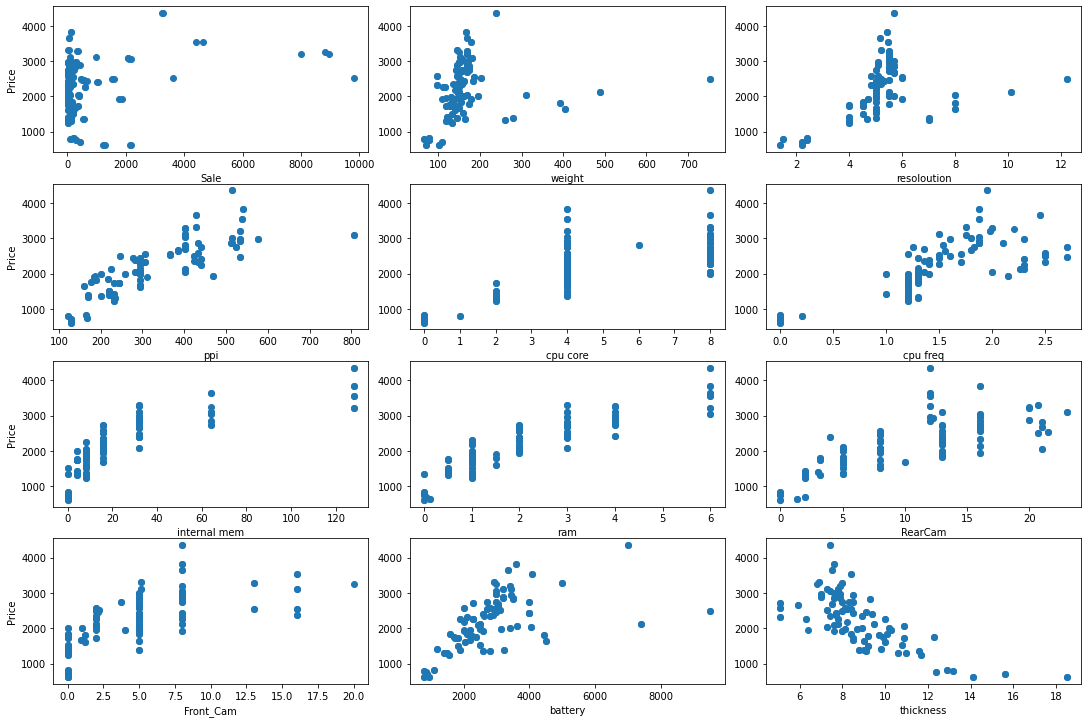

In [36]:
fig, ax = plt.subplots(4,3,figsize=(15,10))
plt.tight_layout()
col=0
for i in range(4):
    for j in range(3):
        ax[i][j].scatter(data[l[col]],data.Price)
        ax[i][j].set_xlabel(l[col])
        if j==0:
            ax[i][j].set_ylabel('Price')
        col+=1


<AxesSubplot:>

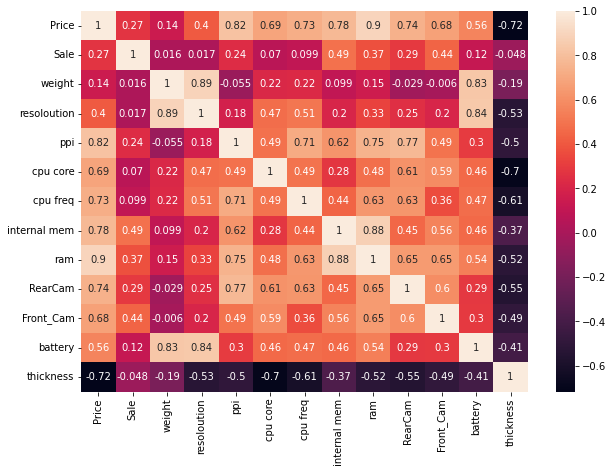

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [38]:
x=data.drop(['Price'],axis=1)
y=data.Price

In [39]:
x.head()

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [40]:
S=StandardScaler()
x=S.fit_transform(x)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=11,test_size=0.2)

In [42]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9607426428220835

In [43]:
Model=RandomForestRegressor()

In [44]:
Model.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
Model.score(x_test,y_test)

0.9645330616181201

In [46]:
ypredict=Model.predict(x_test)

In [47]:
res=pd.DataFrame({'Actual Values':y_test,
'Predicted Values':ypredict})
res

,Actual Values,Predicted Values
86,791,786.28
159,3211,3359.74
52,2859,2977.60
22,2977,2952.99
51,1347,1417.71
143,2508,2556.26
30,2258,2155.10
108,1676,1799.84
58,1989,2062.75
100,2343,2373.79


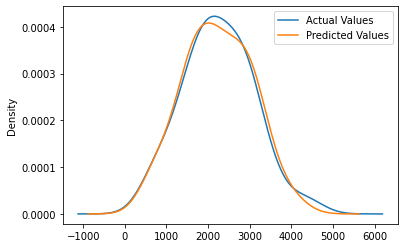

In [48]:
res['Actual Values'].plot(kind='kde',label='Actual Values')
res['Predicted Values'].plot(kind='kde',label='Predicted Values')
plt.legend()

Predictive system

In [56]:
input=[[10, 135.0, 5.2, 424,	8,	1.35,	16.0,	3.000,	13.00,	8.0, 2610,	7.4]]
def PhonePrice(Input):
    S=StandardScaler()
    Input=S.fit_transform(Input)
    price=Model.predict(Input)
    return price
res=PhonePrice(input)
res[0]

2420.66